## Importing the libraries

In [1]:
from nltk import sent_tokenize, pos_tag
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.util import mark_negation
from string import punctuation
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
def penn_to_wn(tag):
    """
        Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [3]:
def get_sentiment_score(text):
    
    """
        This method returns the sentiment score of a given text using SentiWordNet sentiment scores.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0
    raw_sentences = sent_tokenize(text)
    
    for sentence in raw_sentences:

        sent_score = 0     
        sentence = str(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        tags = pos_tag(tokens)
        for word, tag in tags:
            wn_tag = penn_to_wn(tag)
            if not wn_tag:
                continue
            lemma = WordNetLemmatizer().lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sent_score += swn_synset.pos_score() - swn_synset.neg_score()

        total_score = total_score + (sent_score / len(tokens))

    
    return (total_score / len(raw_sentences)) * 100


In [4]:
reviews = pd.read_csv("small_data.csv")

In [5]:
reviews.shape

(4500, 12)

In [6]:
reviews.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,False,"11 18, 2015",A2ZBZ74VIW6SDJ,B00W8FYF56,Aaron B.,". . . The ability to destroy a franchise is insignificant next to the power of the PS4.\n\nAs a real Star Wars geek and Battlefront II (PS2) veteran, I echo the critics sentiments: EA falls short again. This game is nothing but online battles with/against vulgar 12-year-olds and ber elitists who take the game way too seriously. There is no single-player story or campaign mode. There are no real space battlesthey took the star out of Star Wars. Its nothing but a lackluster first-person shooter (or a rail shooter for the speeder bikes, which actually aren't too bad).\n\nSound:\nThe music doesnt particularly stand out (nor should it), but they did a great job of recording Star Wars music. I have (and am familiar with) all the film soundtracks, and I appreciate the verisimilitude. The voice acting is terrible, however. Princess Leia sounds nothing like the films. Nor does Vader. There are so many great Darth Vader voice synthesizers out there, but they couldn't bother. Just about anybody can do a better Darth Vader impression than whomever they cast. Admiral Ackbar doesnt sound too bad though.\n\nGraphics:\nThe graphics are picturesque, which is a pity because this is a video game and not a picture. As aesthetic as they may be, theres a limited range pop-up, which makes shooting flying vehicles from the ground improbable. The waypoint markers block your view and are often off-target. But they did a really good job of making beautiful, screen-accurate locales.\n\nControls:\nThe controls are nice and responsive, but the default control scheme is limited and backwards. Youd expect a version (or at least a variant) of the Star Wars Battlefront II controls, but nope. They have a few setting to swap buttons, but there aren't many options. Theres no ability to roll the X-wing, which is integral to any flight simulator. Its basically a flying snowmobile that gets stuck upside-down a lot. The Jedi are the same as in Battlefront II, only the Jedi are slower and need to recharge for ten seconds after using the Force, because, you know, that makes sense.\n\nFun Factor:\nThis game is an online FPS and nothing more. Anything the game offers is better found in Call of Duty or Battlefield, whichever camp you find yourself in. You can try to play it sheerly for the Star Wars brand, but the game will ruin itself for you quickly. What an incredible disappointment. We were all hoping for an updated/rebooted Battlefront II after ten years, but EA admitted that a real (non-cloned) game isn't worth its time. EA earned Consumerists Worst Company in America award (beating tardy airlines and shifty banks) twice for this reason.","""Don't be too proud of this technological terror you've constructed. . . . """,1447804800,75.0,{'Format:': ' Video Game'},NaN
1,1.0,True,"02 3, 2012",A1AL9R7KUE049Y,B000VRCNLG,mopar,"Years ago I had an early version of the microsoft combat game and it worked super on a windows 95. i now have a windows 7 with a logitech ext. 3d joystick. I had great hopes when i loaded up this game,boy was I dissapointed when I tried to fly a legendary Mustang. The aircraft couldn't climb and do a loop no matter how fast i was going. It turned like a oil tanker ,and couldn't go very fast even flying straight and level. Then i tried the P-80,it flew no better. A waste of hard earned cash , at least for me it was. mopar",p-51 flys like a brick with a anchor,1328227200,2.0,NaN,NaN
2,1.0,False,"11 23, 2008",AF2HX24P7K1FF,B00166R2RQ,Zen*Yogi*Girl,"We got this looking for another game that would work with the Wii Fit board! Its about to be returned!!\nI agree with the other reviews - this game has some serious flaws which affect playability and general fun!\nFirst Wii Cheer had a great idea in allowing you to use one remote in each hand to execute the moves - this game, in contrast, ha

In [7]:
reviews.dropna(subset=['reviewText'], inplace=True)

In [8]:
reviews.shape

(4499, 12)

In [9]:
reviews['swn_score'] = reviews['reviewText'].apply(lambda text : get_sentiment_score(text))

### Sample outputs

In [10]:
reviews[['reviewText','swn_score']].sample(2)

,reviewText,swn_score
3210,"I first discovered Professor Layton and the Curious Village when it was released and quickly became a fan of the series. With Professor Layton and the Diabolical Box, my love for the series remains the same. After completing the story line of the game I learned that all in all, this game has over 138 puzzles with a few hidden extra puzzles that I have yet to unlock. In addition to this, there are more puzzles that can be downloaded via Nintendo wi-fi connection. So if you love brainteasers, this game is chock full of them just like its predecessor. What makes the Professor Layton series different that just a collection of brain teasers is the mysterious story line attached to it, as well as it's wonderful art style.\n\nThe gameplay consists of Professor Layton and his apprentice Luke as they explore through charming European-like villages and a train all while trying to find the answer of the cryptic Elysian box. As you explore, there are puzzles that you come across that you can solve. If you get stuck with one of these brainteasers, there are hint coins you can find allowing you to unlock up to three hints per puzzle (which can come in handy for those tough ones). At the ending you'll have needed to solve at least 80 puzzles to be able to beat the game.\n\nThe story line for this game was nothing that I would have expected, which is good. I hate figuring out the ending at the beginning, but I honestly had no idea and was surprised in an unrealistic turn of events in the end. (I think I found a plot hole, but I don't mind pardoning it because the idea was original enough in the first place). Anyway, The story is illustrated through fabulous animated cutscenes and makes you crave for more as you wish to learn more about the intriguing characters that you are presented. There seems to be more voice acting than the first game as well. Also if you have not played the first, you can easily play this one because there are no spoilers to the first one in this one--there are returning characters, but you are not told how you met in the previous game.\n\nWhere this game is better than the first:\nI like being able to explore multiple places/towns.\nI liked the addition of Flora in this game, even though she does not solve the puzzles herself, she does join you at times.\n\nAdditional features that are so/so:\nThere is a tea mixing minigame, it's fun, but can be frustrating trying to figure out the exact ingredients.\nThere is a hamster minigame where you try to make the hamster lose weight. (Wii fit anyone?)\n\nAny negatives?\nWell, the story did seem way out there and unrealistic, but thats okay, at least it was not predictable.\n\nAll in all this game is definitely worth 30 bucks and is refreshing, charming and a workout for your brain. I am totally jealous Japan already has two more games and movie and can't wait for the next one to be released here.",1.906028
4061,"Socom 2 is one of those games that changes gaming everywhere. Kind of like how Halo and Metroid Prime described how an FPS should be and how Soul Calibur showed how Fighting games should be made on next genn systems Socom showed how Online Gaming is meant to be played.\nFor Noobs to the game, socom is about you leading a group of Navy Seals and doing various missions. But this isn't a shoot em up game, oh no its not. This is a game based on stealth. You use foilage, just like real Navy Seals to get to your desiginated goals and your point in the game is to not be fast, but to be quiet and efficient. On your tv is only half the game though, the game really starts when you hit it online.\nOnline Socom is amazing. There's a headset, where you can talk to your teamates on and there are desginated missions for you and you counter-sterrorists/navy seals team to do. There's always a feeling like your actually in them game, something the headset really helps you with. It brings the game to life alot. It's as if anything you feel you say like if someo

In [11]:
reviews[['reviewText','swn_score']].sample(2)

,reviewText,swn_score
2190,"The graphics are good and the puzzles are enjoyable and not too hard, but the story, to me, is cheesy enough to be distractable. If you can allow yourself to be pursued by something called ""The Shadow Legion"" without falling out, you should be okay. I often felt as if I was walking around inside a child's cartoon, and a bad one. However, if you're looking at a game called ""The Sacred Rings"" (like I did), the fantasy elements shouldn't be a problem. Overall, the game was engaging and fun to play- the tram rides are a great way to travel!- but it often seemed as if the sappy adventure story was simply in place to accomodate the puzzles.",0.629496
4321,good game,37.500000


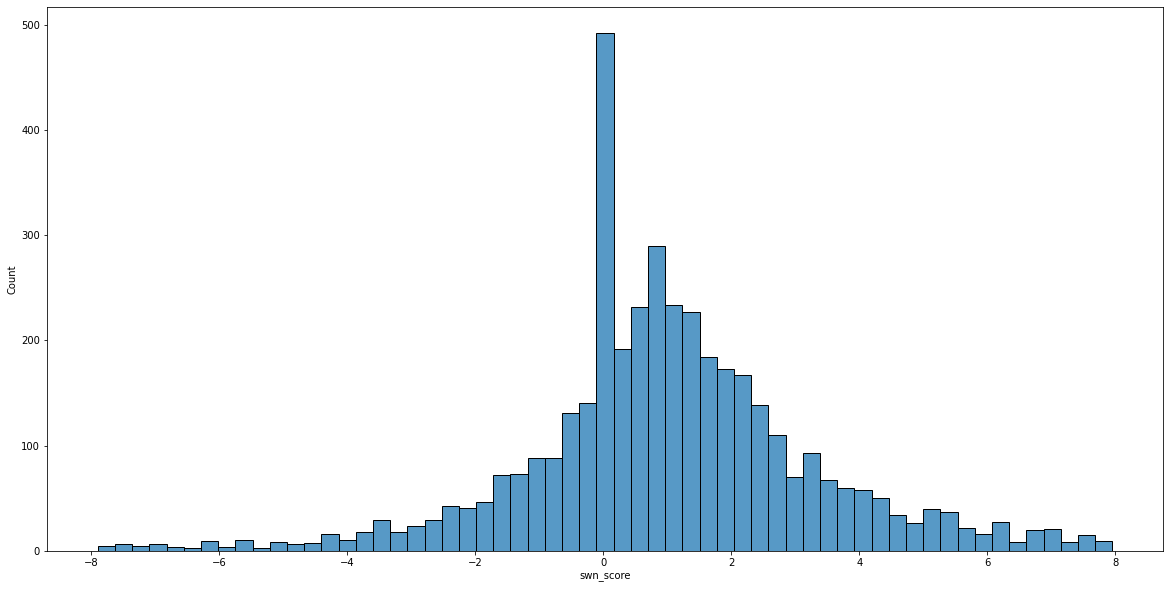

In [12]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='swn_score', data=reviews.query("swn_score < 8 and swn_score > -8"), ax=ax)
plt.show()

In [13]:
reviews['swn_sentiment'] = reviews['swn_score'].apply(lambda x: "positive" if x>1 else ("negative" if x<0.5 else "neutral"))

In [14]:
reviews['swn_sentiment'].value_counts(dropna=False)

positive    2223
negative    1774
neutral      502
Name: swn_sentiment, dtype: int64

<AxesSubplot:xlabel='overall', ylabel='count'>

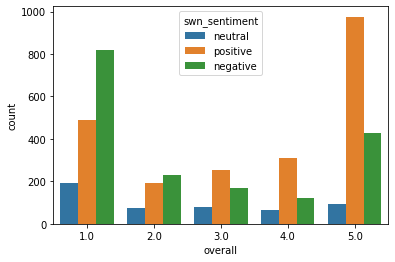

In [15]:
sns.countplot(x='overall', hue='swn_sentiment' ,data = reviews)

<AxesSubplot:xlabel='swn_sentiment', ylabel='overall'>

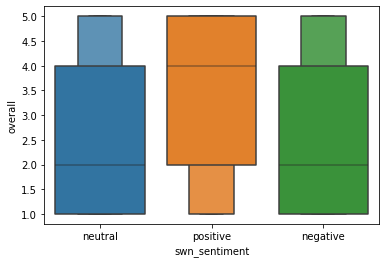

In [16]:
sns.boxenplot(x='swn_sentiment', y='overall', data = reviews)

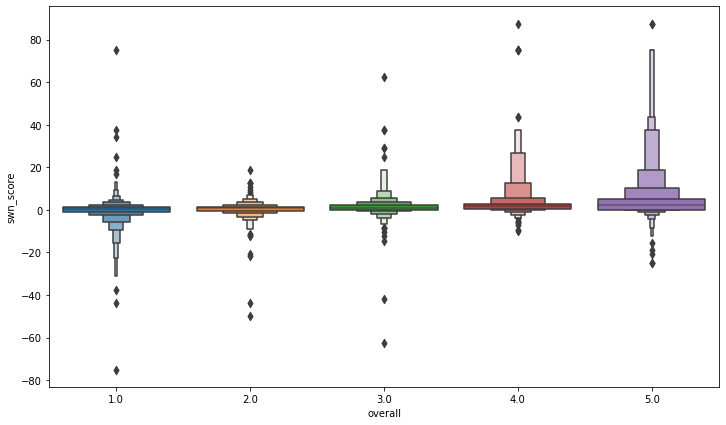

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='overall', y='swn_score', data = reviews, ax=ax)
plt.show()

In [18]:
reviews['true_sentiment'] = \
    reviews['overall'].apply(lambda x: "positive" if x>=4 else ("neutral" if x==3 else "negative"))

In [19]:
y_swn_pred, y_true = reviews['swn_sentiment'].tolist(), reviews['true_sentiment'].tolist()

In [20]:
len(y_swn_pred), len(y_true)

(4499, 4499)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_swn_pred)

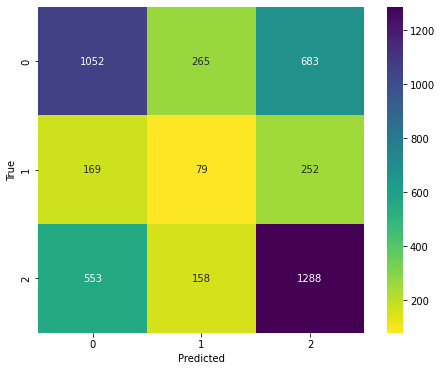

In [22]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

## Performance Assessment

### Negative Sentiment Prediction Assessment

In [23]:
tp, tn, fp, fn = 1088, 70+242+142+1310, 265+647, 188+547

In [24]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

In [25]:
print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.5968184311574328
precission: 0.544
f1 score: 0.5691865027465342


In [23]:
tp, tn, fp, fn = 1310, 1088+265+70+188, 242+647, 142+547
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)
print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.655327663831916
precission: 0.5957253296953161
f1 score: 0.6241067174845164


## Sentiment Scoring Model Using NLTK Opinion Lexicon

In [24]:
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download("opinion_lexicon")

[nltk_data] Downloading package opinion_lexicon to C:\Users\Rishabh
[nltk_data]     Nagar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\opinion_lexicon.zip.


True

In [25]:
pos_words = list(opinion_lexicon.positive())
neg_words = list(opinion_lexicon.negative())

In [26]:
def get_sentiment_score_oplex(text):
    
    """
        This method returns the sentiment score of a given text using nltk opinion lexicon.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0

    raw_sentences = sent_tokenize(text)
    
    for sentence in raw_sentences:

        sent_score = 0     
        sentence = str(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        for token in tokens:
            sent_score = sent_score + 1 if token in pos_words else (sent_score - 1 if token in neg_words else sent_score)
        total_score = total_score + (sent_score / len(tokens))

    
    return total_score

In [27]:
reviews['oplex_sentiment_score'] = reviews['reviewText'].apply(lambda x: get_sentiment_score_oplex(x))

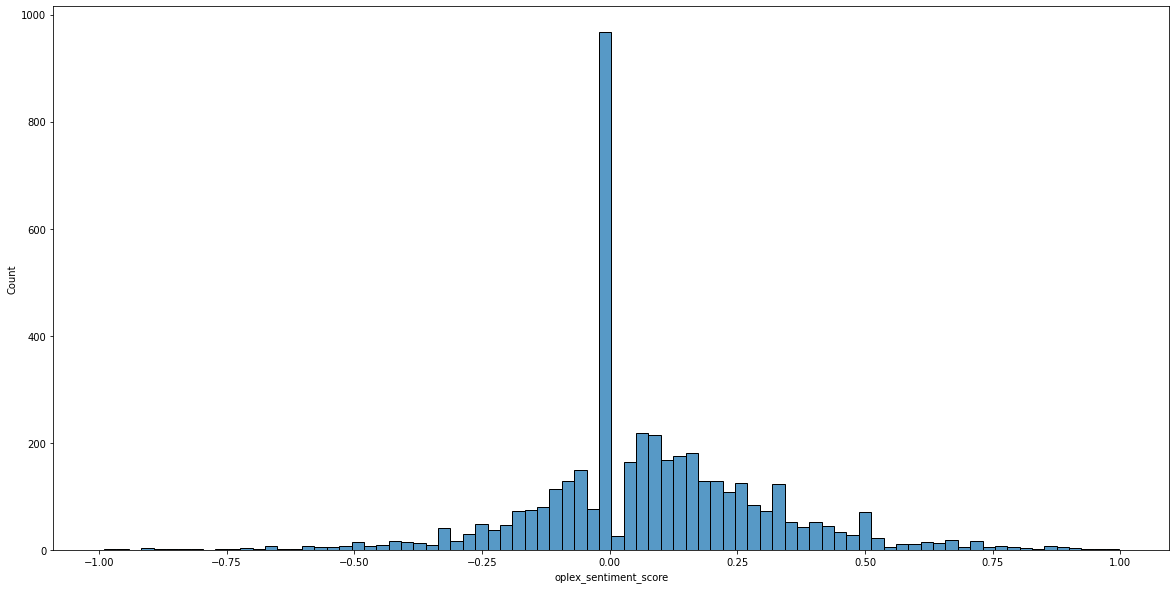

In [28]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='oplex_sentiment_score',\
             data=reviews.query("oplex_sentiment_score < 1 and oplex_sentiment_score>-1"), ax=ax)
plt.show()


In [29]:
reviews['oplex_sentiment'] = \
    reviews['oplex_sentiment_score'].apply(lambda x: "positive" if x>0.1 else ("negative" if x<0 else "neutral"))

In [30]:
reviews['oplex_sentiment'].value_counts(dropna=False)

positive    1846
neutral     1583
negative    1070
Name: oplex_sentiment, dtype: int64

<AxesSubplot:xlabel='overall', ylabel='count'>

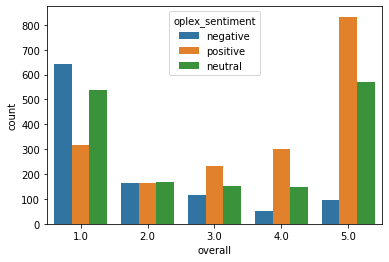

In [31]:
sns.countplot(x='overall', hue='oplex_sentiment' ,data = reviews)

<AxesSubplot:xlabel='oplex_sentiment', ylabel='overall'>

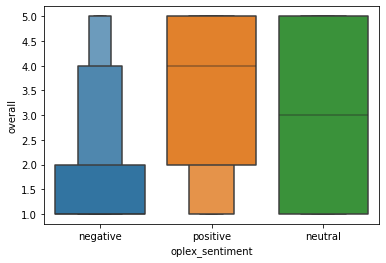

In [32]:
sns.boxenplot(x='oplex_sentiment', y='overall', data = reviews)

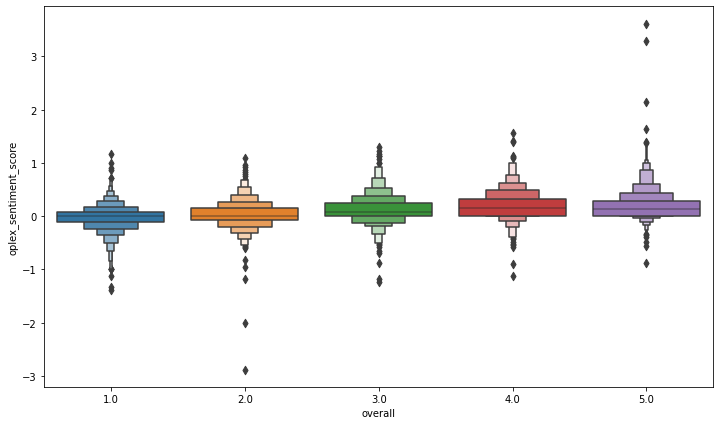

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='overall', y='oplex_sentiment_score', data = reviews, ax=ax)
plt.show()

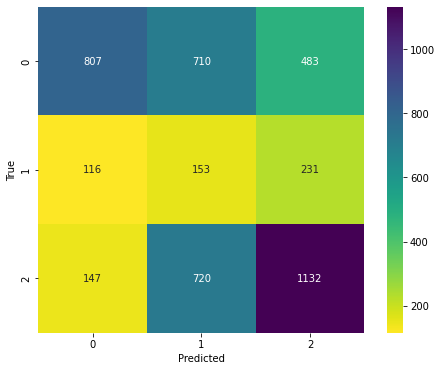

In [34]:
y_oplex_pred = reviews['oplex_sentiment'].tolist()
oplex_cm = confusion_matrix(y_true, y_oplex_pred)
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(oplex_cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

In [35]:
oplex_cm = list(oplex_cm.ravel())

In [36]:
oplex_cm

[807, 710, 483, 116, 153, 231, 147, 720, 1132]

## Negative Label Assessment

In [37]:
tp, tn, fp, fn = 804, 195+199+686+1181, 106+132, 701+495
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.402
precission: 0.7715930902111324
f1 score: 0.5285996055226825


## Positive Label Assessment

In [38]:
tp, tn, fp, fn = 1181, 804+701+106+195, 495+199, 132+686
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.5907953976988495
precission: 0.6298666666666667
f1 score: 0.6097057305110997
